# Assignment Clustering

1. What is the difference between K-Means and Hierarchical Clustering?    Provide a use case for each.
  - K-Means: A partition-based algorithm that divides data into k clusters by minimizing within-cluster variance. Requires predefining k. Best for large datasets.

      - Use Case: Customer segmentation in marketing to group customers by purchasing behavior.

  - Hierarchical Clustering: A tree-based algorithm that builds nested clusters using agglomerative (bottom-up) or divisive (top-down) approaches. Does not require predefining k and produces a dendrogram.

      - Use Case: Organizing research articles into topic hierarchies when the number of clusters is unknown.

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
  - The Silhouette Score measures how well data points fit within their assigned cluster compared to other clusters.

  - It ranges from -1 to +1:

      - +1 → Point is well-matched to its cluster and poorly matched to others.

      - 0 → Point lies between clusters.

      - -1 → Point is likely misclassified.

  - Purpose: Helps evaluate cluster quality and choose the right clustering method or number of clusters.

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?
  - eps (ε): The maximum distance between two points to be considered neighbors. Smaller ε → tighter clusters, larger ε → fewer, bigger clusters.

  - minPts: Minimum number of points required to form a dense region. Low minPts → more clusters, high minPts → fewer clusters.

  - Influence: Together, they control whether points are classified as:

      - Core points (dense regions),

      - Border points (on edge of clusters),

      - Noise points (outliers).

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
  - Both K-Means and DBSCAN rely on distance metrics (e.g., Euclidean distance).

  - If features are on different scales (e.g., income in lakhs vs. age in years), larger-scale features dominate distance calculations.

  - Feature scaling (e.g., standardization or normalization) ensures all features contribute equally, leading to fair and accurate clustering results.

5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
  - The Elbow Method helps find the optimal number of clusters (k) in K-Means.

  - Steps:

      - Run K-Means with different k values.

      - Compute Within-Cluster Sum of Squares (WCSS) for each k.

      - Plot k vs. WCSS.

  - The WCSS decreases as k increases, but after a certain point, the rate of decrease slows → forming an “elbow”.

  - That elbow point = optimal number of clusters, balancing accuracy and complexity.

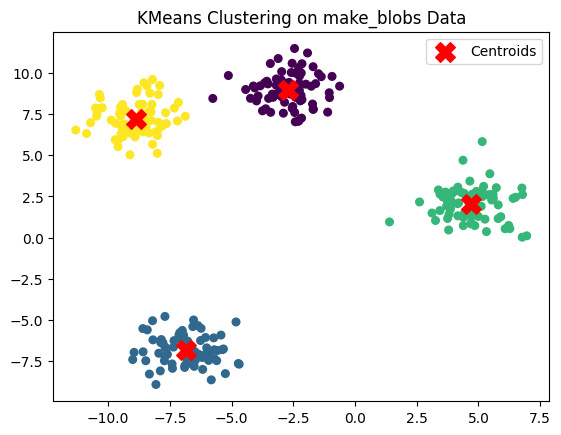

In [1]:
# 6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering on make_blobs Data")
plt.legend()
plt.show()


In [2]:
# 7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
data = load_wine()
X = data.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=6)  # tune eps, min_samples
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise: label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 6


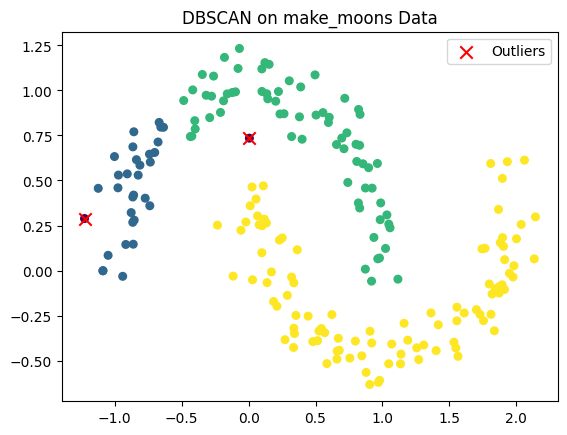

In [3]:
# 8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

from sklearn.datasets import make_moons

# Generate data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot clusters with outliers highlighted
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c='red', marker='x', s=80, label='Outliers')
plt.title("DBSCAN on make_moons Data")
plt.legend()
plt.show()


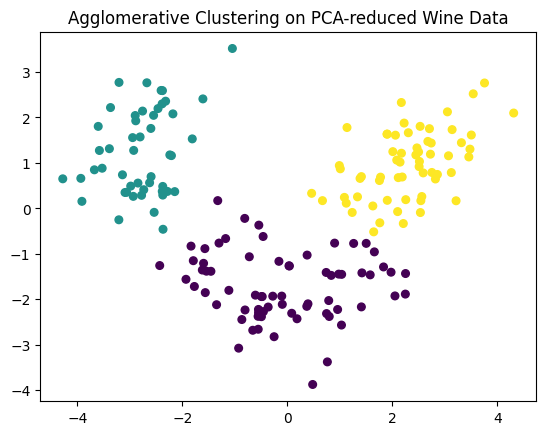

In [4]:
# 9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Agglomerative Clustering on PCA-reduced Wine Data")
plt.show()


10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

  Describe your real-world data science workflow using clustering:


  ● Which clustering algorithm(s) would you use and why?

  ● How would you preprocess the data (missing values, scaling)?

  ● How would you determine the number of clusters?

  ● How would the marketing team benefit from your clustering analysis?

  - Algorithm Choice:

      - Start with K-Means for large datasets (fast, interpretable).

      - Test DBSCAN to detect outliers (e.g., rare shoppers).

      - Optionally use Hierarchical Clustering for smaller subsets to see customer group hierarchy.

  - Preprocessing:

      - Handle missing values (imputation).

      - Scale features using StandardScaler since purchase values and demographics vary in scale.

      - Encode categorical data (OneHotEncoder).

  - Determine Clusters:

      - Use Elbow Method or Silhouette Score.

  - Benefits to Marketing:

      - Identify high-value customers, discount-sensitive shoppers, occasional buyers.

      - Run targeted promotions → improved sales conversion and customer satisfaction.


Optimal number of clusters: 2
   Age  Annual_Income  Spending_Score  Cluster
0   25          35000              60        1
1   34          45000              65        1
2   45          60000              80        1
3   23          20000              30        1
4   35          52000              70        1
5   65          80000              20        0
6   40          72000              50        0
7   30          40000              85        1
8   50          65000              40        0
9   28          30000              75        1


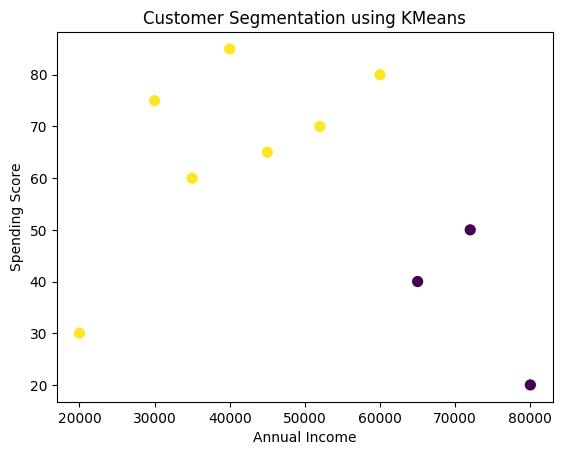

In [5]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Example dataset (replace with real e-commerce data)
data = {
    'Age': [25, 34, 45, 23, 35, 65, 40, 30, 50, 28],
    'Annual_Income': [35000, 45000, 60000, 20000, 52000, 80000, 72000, 40000, 65000, 30000],
    'Spending_Score': [60, 65, 80, 30, 70, 20, 50, 85, 40, 75]
}
df = pd.DataFrame(data)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply KMeans with different k to find optimal clusters
scores = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append((k, score))

# Choose best k
best_k = max(scores, key=lambda x: x[1])[0]
print("Optimal number of clusters:", best_k)

# Final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df)

# Visualize clusters
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segmentation using KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
